# K-Means 고객 세분화 (비지도학습)

**목표**: 정답 없이 쇼핑몰 고객 데이터에서 비슷한 고객끼리 그룹 찾기

---

## Step 0: 한글 폰트 설정

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null 2>&1

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

print("한글 폰트 설정 완료!")

한글 폰트 설정 완료!


## Step 1: 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

print("라이브러리 로드 완료!")

라이브러리 로드 완료!


## Step 2: 데이터 불러오기

Mall Customer 데이터셋 - 쇼핑몰 고객 200명의 정보

In [4]:
# 데이터 다운로드
url = 'https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv'
df = pd.read_csv(url)

print(f"데이터 크기: {df.shape[0]}명의 고객")
print("\n컬럼 목록:")
print(df.columns.tolist())
print("\n데이터 미리보기:")
df.head()

데이터 크기: 200명의 고객

컬럼 목록:
['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

데이터 미리보기:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 컬럼 설명

| 컬럼 | 설명 |
|------|------|
| CustomerID | 고객 ID |
| Gender | 성별 |
| Age | 나이 |
| Annual Income (k$) | 연소득 (천 달러) |
| Spending Score (1-100) | 지출 점수 (쇼핑몰에서 부여) |

## Step 3: 데이터 준비

2D 시각화를 위해 연소득과 지출점수만 사용

In [5]:
# 연소득과 지출점수만 선택
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

print("사용할 피처:")
print(X.head())

print("\n** 비지도학습: y(정답)가 없습니다! **")

사용할 피처:
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

** 비지도학습: y(정답)가 없습니다! **


## Step 4: 데이터 시각화 (군집화 전)

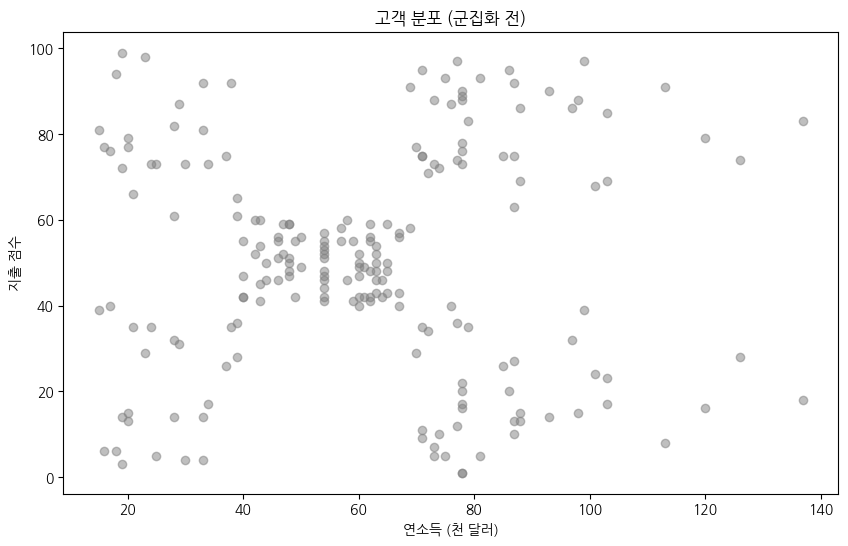

눈으로 봤을 때 몇 개의 그룹이 보이나요?


In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],
            c='gray', alpha=0.5)
plt.xlabel('연소득 (천 달러)')
plt.ylabel('지출 점수')
plt.title('고객 분포 (군집화 전)')
plt.show()

print("눈으로 봤을 때 몇 개의 그룹이 보이나요?")

## Step 5: K-Means 군집화

In [7]:
# K-Means 모델 생성 (5개 그룹으로 분류)
kmeans = KMeans(
    n_clusters=5,      # 5개 그룹
    random_state=42,
    n_init=10
)

# 학습 및 라벨 예측
labels = kmeans.fit_predict(X)

print(f"각 고객의 그룹 (처음 10명): {labels[:10]}")
print(f"\n그룹별 고객 수:")
for i in range(5):
    count = (labels == i).sum()
    print(f"  그룹 {i}: {count}명")

각 고객의 그룹 (처음 10명): [4 2 4 2 4 2 4 2 4 2]

그룹별 고객 수:
  그룹 0: 81명
  그룹 1: 39명
  그룹 2: 22명
  그룹 3: 35명
  그룹 4: 23명


## Step 6: 결과 시각화

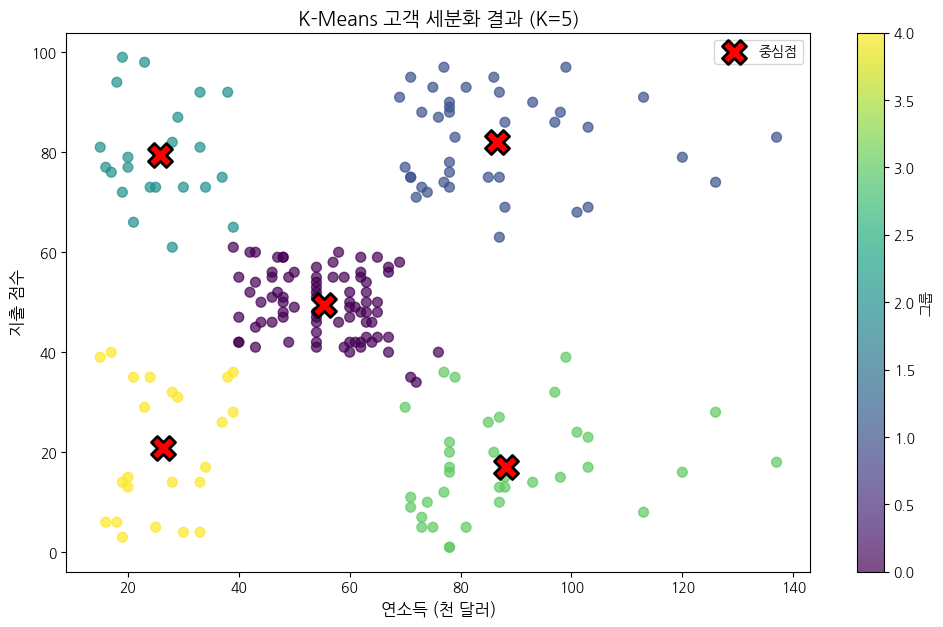

In [8]:
# 그룹별로 다른 색으로 시각화
plt.figure(figsize=(12, 7))

# 산점도 (각 그룹 다른 색)
scatter = plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],
                      c=labels, cmap='viridis', s=50, alpha=0.7)

# 중심점 표시 (빨간 X)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],
            c='red', marker='X', s=300, edgecolors='black', linewidths=2,
            label='중심점')

plt.xlabel('연소득 (천 달러)', fontsize=12)
plt.ylabel('지출 점수', fontsize=12)
plt.title('K-Means 고객 세분화 결과 (K=5)', fontsize=14)
plt.colorbar(scatter, label='그룹')
plt.legend()
plt.show()

## Step 7: 그룹 해석

In [9]:
# 각 그룹의 특성 분석
df['Cluster'] = labels

print("=" * 50)
print("각 그룹의 평균 특성")
print("=" * 50)

cluster_analysis = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)
print(cluster_analysis)

print("\n" + "=" * 50)
print("그룹 해석")
print("=" * 50)

for i in range(5):
    income = cluster_analysis.loc[i, 'Annual Income (k$)']
    spending = cluster_analysis.loc[i, 'Spending Score (1-100)']

    income_level = "고소득" if income > 70 else "저소득" if income < 40 else "중간소득"
    spending_level = "고지출" if spending > 60 else "저지출" if spending < 40 else "중간지출"

    print(f"그룹 {i}: {income_level} + {spending_level}")

각 그룹의 평균 특성
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                      55.3                    49.5
1                      86.5                    82.1
2                      25.7                    79.4
3                      88.2                    17.1
4                      26.3                    20.9

그룹 해석
그룹 0: 중간소득 + 중간지출
그룹 1: 고소득 + 고지출
그룹 2: 저소득 + 고지출
그룹 3: 고소득 + 저지출
그룹 4: 저소득 + 저지출


## 도전 과제: 최적의 K 찾고 마케팅 전략 세우기!

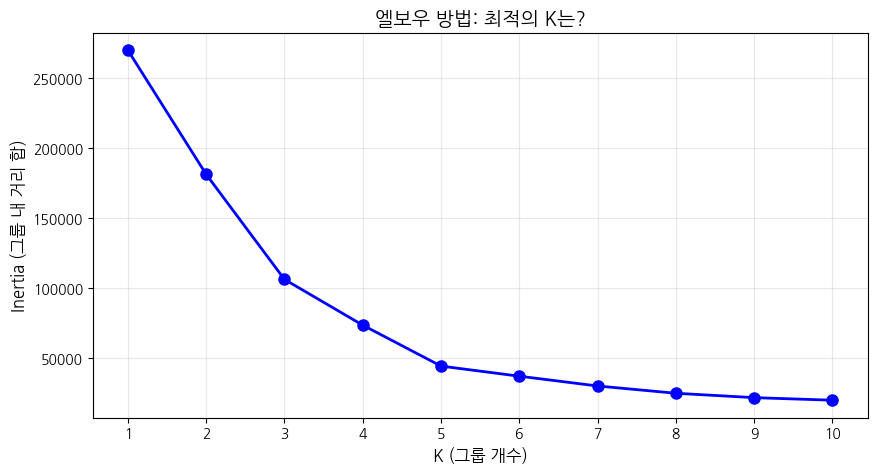

Q. 그래프를 보고 최적의 K를 찾아보세요!
   힌트: 급격히 꺾이다가 완만해지는 지점


In [10]:
# 도전 1: 엘보우 방법으로 최적의 K 찾기
# 그래프에서 '팔꿈치'처럼 꺾이는 지점이 최적의 K!

inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X)
    inertias.append(kmeans_temp.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('K (그룹 개수)', fontsize=12)
plt.ylabel('Inertia (그룹 내 거리 합)', fontsize=12)
plt.title('엘보우 방법: 최적의 K는?', fontsize=14)
plt.xticks(K_range)
plt.grid(True, alpha=0.3)
plt.show()

print("Q. 그래프를 보고 최적의 K를 찾아보세요!")
print("   힌트: 급격히 꺾이다가 완만해지는 지점")

In [11]:
# 도전 2: 각 그룹에 이름 붙이고 마케팅 전략 세우기!

# 그룹별 평균 확인
print("=" * 60)
print("각 그룹의 특성")
print("=" * 60)

for i in range(5):
    group = df[df['Cluster'] == i]
    avg_income = group['Annual Income (k$)'].mean()
    avg_spending = group['Spending Score (1-100)'].mean()
    count = len(group)
    print(f"\n그룹 {i}: {count}명")
    print(f"  평균 연소득: ${avg_income:.0f}k")
    print(f"  평균 지출점수: {avg_spending:.0f}점")

print("\n" + "=" * 60)
print("아래 빈칸을 채워보세요!")
print("=" * 60)

각 그룹의 특성

그룹 0: 81명
  평균 연소득: $55k
  평균 지출점수: 50점

그룹 1: 39명
  평균 연소득: $87k
  평균 지출점수: 82점

그룹 2: 22명
  평균 연소득: $26k
  평균 지출점수: 79점

그룹 3: 35명
  평균 연소득: $88k
  평균 지출점수: 17점

그룹 4: 23명
  평균 연소득: $26k
  평균 지출점수: 21점

아래 빈칸을 채워보세요!


In [12]:
# 도전 2 계속: 그룹 이름과 마케팅 전략 작성하기
# 아래 빈칸을 채워보세요!

group_names = {
    0: "___",  # 예: "알뜰형 고객", "VIP", "잠재 고객" 등
    1: "___",
    2: "___",
    3: "___",
    4: "___"
}

marketing_strategy = {
    0: "___",  # 예: "프리미엄 멤버십 제안", "할인 쿠폰 발송" 등
    1: "___",
    2: "___",
    3: "___",
    4: "___"
}

# 결과 출력
print("\n나의 마케팅 전략")
print("=" * 60)
for i in range(5):
    print(f"그룹 {i} [{group_names[i]}]: {marketing_strategy[i]}")


나의 마케팅 전략
그룹 0 [___]: ___
그룹 1 [___]: ___
그룹 2 [___]: ___
그룹 3 [___]: ___
그룹 4 [___]: ___


In [13]:
# 예시 답안 (먼저 직접 해보고 나서 확인하세요!)

example_names = {
    0: "중간층",
    1: "알뜰 고소득",
    2: "핵심 VIP",
    3: "저소득 저지출",
    4: "젊은 소비러버"
}

example_strategy = {
    0: "일반 프로모션, 포인트 적립 강조",
    1: "프리미엄 상품 추천으로 지출 유도",
    2: "VIP 전용 혜택, 신상품 우선 안내",
    3: "할인 쿠폰, 가성비 상품 추천",
    4: "트렌디한 상품, SNS 이벤트"
}

print("예시 마케팅 전략")
print("=" * 60)
for i in range(5):
    print(f"{example_names[i]}: {example_strategy[i]}")

예시 마케팅 전략
중간층: 일반 프로모션, 포인트 적립 강조
알뜰 고소득: 프리미엄 상품 추천으로 지출 유도
핵심 VIP: VIP 전용 혜택, 신상품 우선 안내
저소득 저지출: 할인 쿠폰, 가성비 상품 추천
젊은 소비러버: 트렌디한 상품, SNS 이벤트
